<a href="https://colab.research.google.com/github/mandudu/Machine-Learning-Projects/blob/main/Not_So_Linear_Regression_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Not So Linear Regression (50 Total Points)

Often times linear regression is presented in terms of input features, which results in linear models (shocker!). Linear models are an already powerful technique, but they are super-charged when constructed atop of *non*linear features. Arguebly, the constrution of linear models with nonlinear features is one of the strongest (and most used) tricks in ML and is core to neural networks. Below we explore how the expressiveness of linear models increases based on features. This highlights the importance of the question, "*Linear in what?*"


## Data and Setup

First, it may help to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, confirm that we can connect to the GPU with tensorflow.

*(Note, it is fine if you can not connect to GPU, it just might take a little longer to run.)*

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Let's import additional packages of use.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**Generate data.**

Generate $N$ data samples of input (1d) features $X$ and outputs $Y$, which shall depend non-linearly on $X$.

In [ ]:
d = 1
N = 2000

X = tf.random.normal((N, 1))

def f(x):
  return tf.exp(0.5*x)+2.0*x*tf.sin(4.0*x)

sigma = 0.5
Y = f(X) + sigma*tf.random.normal((N,1))

Visualize the data.

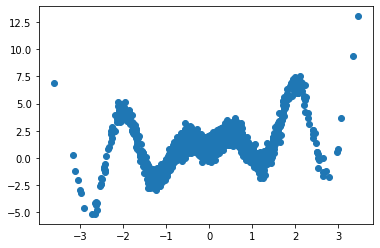

In [ ]:
plt.scatter(X, Y)

## Linear Regression (17 Points)
**(12 Points)** First let's implement a function that returns the linear coefficients for ordinary least squares regression.

In [ ]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  # TODO: here you are restricted (have to) use tf.linalg.solve for the assignment
  beta = None  # REMOVE
  beta = tf.linalg.solve(tf.matmul(X, X, transpose_a=True), tf.matmul(X, Y, transpose_a=True))
  return beta

**(5 Points)** Clearly, the groundtruth relationship is not a linear one. However, let's see what the best linear fit is for this data.

In [ ]:
# TODO: be sure to account for an intercept term
# beta_linear = linear_coefs(...)
beta_linear = None  # REMOVE
Y_linear = None  # REMOVE, should be the predicted Ys using linear model on training data

X_ones = tf.concat((X, tf.ones((N, 1))), 1)
beta_linear = linear_coefs(X_ones, Y)
Y_linear = tf.matmul(X_ones, beta_linear)

Let's plot the linear predictions.

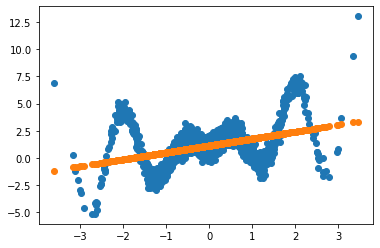

In [ ]:
plt.scatter(X, Y)
plt.scatter(X, Y_linear)

As you can see this captures some trend, but leaves a lot to be desired.

## Polynomial Regression (16 Points)
Let's turn back time and revist an algebra course classic: polynomials! Recall that polynomial are made up of monomials, which are products of variable (features) take to powers. With 1d data, these are terms like $x^2$, $x^7$, etc. When we fit a polynomial, we are looking for $\beta$ coeficients to $\hat{f}(x) = \sum_{j=1}^m \beta_j x^j + \beta_0$. Does this look familiar? (It should!)

**(16 points)** Let's fit a polynomial using OLS. In particular, let's fit a polynomial of order $8$.

In [ ]:
# First generate the features corresponding to a 8th order 1d polynomial.
# You'll lose points :( if you do not do it in a simple, single line
X_poly = None  # REMOVE
# Lets get the corresponding polynomial coefficients
beta_poly = None  # REMOVE
# Finally lets plot the estimates with the polynomial
Y_poly = None  # REMOVE

X_poly = tf.concat([tf.pow(X, j) for j in range(9)], 1)
beta_poly = linear_coefs(X_poly, Y)
Y_poly = tf.matmul(X_poly, beta_poly)

Let's plot the polynomial estimates.

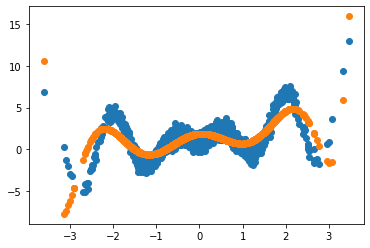

In [ ]:
plt.scatter(X, Y)
plt.scatter(X, Y_poly)

A much better fit! In the future we'll discuss how to choose hyperparemeters to our model (such as the order of polynomials). For now, just play around with the order to see how estimates vary.

## Random-Feature Regression (10 Points)
Lastly, we'll consider a seemingly crazy idea: performing linear regression over *random* features. That is, we shall fit a model $\hat{f}(x) = \sum_{j=1}^m \beta_j \phi_j(x)$. Where $\phi_j(x)$ are randomly constructed features. In particular, we shall construct $\phi_j(x) = \cos(\omega_j^T x + b_j)$ where $\omega_j$ was drawn from a Gaussian, and $b_j$ from a Uniform distribution. Note that $(\omega_j, b_j)$s are draw randomly once, and are then *held fixed* for the remainer of their usage. (Think about what goes wrong if they are redrawn randomly each time.) Although this seems adhoc, a linear model on such random features are actually approximating a very flexible class of functions (see https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf).

In [ ]:
def rand_feats(X, D=1000, gamma=1.0):
  """
  Args:
    X: N x d matrix of input features
    D: Integer, number of random features
    gamma: Float, scale of frequencies

  Returns:
    Phis: N x D matrix of random features
  """
  d = X.get_shape()[1]
  tf.random.set_seed(112358)  # Why is this needed?
  Ws = gamma*tf.random.normal((d, D))
  bs = 2.0*np.pi*tf.random.uniform((1, D))
  XWs = tf.matmul(X, Ws)
  return tf.cos(XWs+bs)

**(7 Points)** Get predictions based on the random features above.

In [ ]:
# Get the Y estimates using random features. (Default D, gamma is fine.)
Y_randfeats = None  # REMOVE

phi = rand_feats(X)
beta_poly = linear_coefs(phi, Y)
Y_randfeats = tf.matmul(phi, beta_poly)

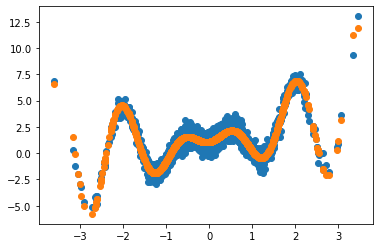

In [ ]:
plt.scatter(X, Y)
plt.scatter(X, Y_randfeats)

Not bad for a bunch of random features! This, along with kernels, are pretty powerful concepts. I highly recommend looking further into random features.

**(10 Points)** Why is it necessary to set the random seed `tf.random.set_seed(112358)` in the function `rand_feats` above. (Think about what would go wrong if we do not do this.) 

*TODO: Answer*

If the seed were not set, then everytime we computed random features we would get different frequencies/offsets $\{(\omega_j, b_j)\}_{j=1}^D$. Note that above we specified that the frequencies are drawn randomly *once*, and are held fixed after. This makes sense, because when we learn $\beta$ coefficients they must be applied to the same features. That is $\beta_j$ is applied to $\cos(\omega_j^T x + b_j)$ in $\hat{f}(x) = \sum_{j=1}^m \beta_j \cos(\omega_j^T x + b_j)$. Applying $\beta_j$ to another feature $\cos(\omega_j^{\,\prime\, T} x + b_j^{\,\prime})$ would result in a completely different estimate that was not fit to our data (and will not perform well). This would make it impossible to use `rand_feats` to get the random features/estimates on future unseen data (we would have had to returned and saved `Ws` and `bs`).